## **Fundamentos de Data Science – Práctica para el Examen**

### **Contexto:**

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.



### **Requisitos:**


#### **1) Limpieza de Datos:**

- El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

**Generamos los datos**

In [32]:
# Importamos las librerias
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

# Fuente: Simulacion de examen. Coding Dojo

Datos generados y guardados en 'user_app_data.csv'


In [33]:
# Examinamos los datos
df = pd.read_csv('user_app_data.csv')
df.head()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


**Identificar y abordar cualquier valor duplicado.**


In [34]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


**Identificar y abordar cualquier dato que falte en este conjunto de datos.** 

Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.

In [35]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

# Fuente: Clase de Manejo de valores nulos 

,datos sin NAs en q,Na en q,Na en %
user_id,300,0,0.0
app_version,300,0,0.0
platform,300,0,0.0
session_duration,300,0,0.0
number_of_sessions,300,0,0.0
country,300,0,0.0
user_feedback,300,0,0.0


**Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.**


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


**Diccionario de Datos:**

- user_id: Identificación única del usuario.
- app_version: Versión de la aplicación usada.
- platform: Plataforma del dispositivo (Android, iOS).
- session_duration: Duración de la sesión en minutos.
- number_of_sessions: Número de sesiones en un día.
- country: País del usuario.
- user_feedback: Puntuación de la experiencia del usuario (1-5).

In [37]:
# Converitimos los tipos de datos
df['platform'] = df['platform'].astype('category')
df['country'] = df['country'].astype('category')
df['session_duration'] = pd.to_timedelta(df['session_duration'], unit='m')
df.dtypes

user_id                         int64
app_version                   float64
platform                     category
session_duration      timedelta64[ns]
number_of_sessions              int64
country                      category
user_feedback                   int64
dtype: object

**Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID)**

In [38]:
for col in df.select_dtypes(include='category').columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'platform':
['Android', 'iOS']
Categories (2, object): ['Android', 'iOS']
Unique values in 'country':
['France', 'UK', 'Canada', 'Germany', 'Mexico', 'USA', 'Spain', 'Italy']
Categories (8, object): ['Canada', 'France', 'Germany', 'Italy', 'Mexico', 'Spain', 'UK', 'USA']


**Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana)**

In [39]:
df[['session_duration', 'number_of_sessions', 'app_version', 'user_id', 'user_feedback']].describe()

,session_duration,number_of_sessions,app_version,user_id,user_feedback
count,300,300.000000,300.000000,300.000000,300.000000
mean,0 days 01:35:50.400000,9.596667,1.155000,150.500000,2.926667
std,0 days 00:51:55.366355947,5.672853,0.113363,86.746758,1.449699
min,0 days 00:01:00,1.000000,1.000000,1.000000,1.000000
25%,0 days 00:51:15,5.000000,1.100000,75.750000,2.000000
50%,0 days 01:40:30,9.000000,1.200000,150.500000,3.000000
75%,0 days 02:21:15,15.000000,1.300000,225.250000,4.000000
max,0 days 02:59:00,19.000000,1.300000,300.000000,5.000000


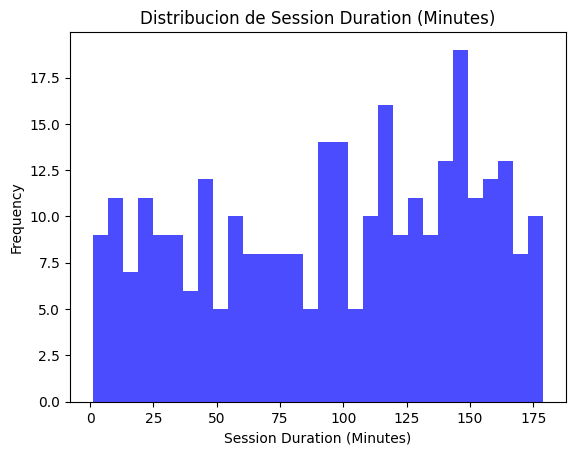

In [40]:
# Plot the histogram para ver la distribución de Session duration 
plt.hist(df['session_duration'].dt.total_seconds() / 60, bins=30, color='blue', alpha=0.7)
plt.title('Distribucion de Session Duration (Minutes)')
plt.xlabel('Session Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()


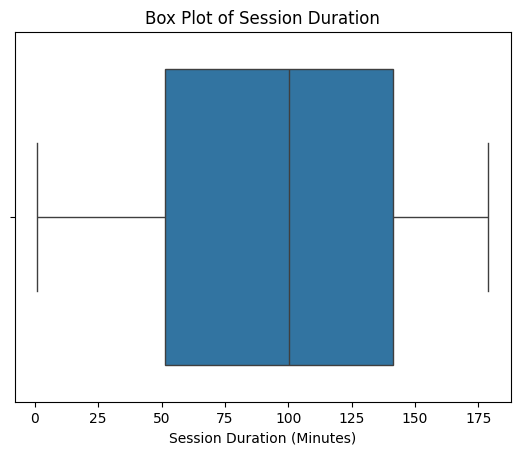

In [41]:
# Visualizamos el boxplot
sns.boxplot(x=df['session_duration'].dt.total_seconds() / 60)
plt.title('Box Plot of Session Duration')
plt.xlabel('Session Duration (Minutes)')
plt.show()

#### **2) Exploración de Datos:**

**El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:**

- Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

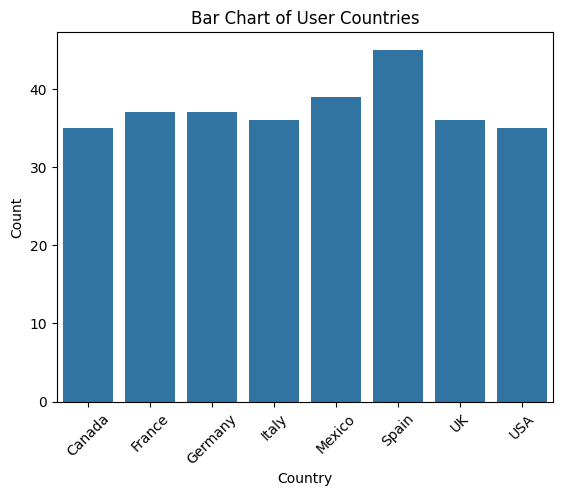

In [50]:
# Bar Chart de Country
sns.countplot(x='country', data=df)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Bar Chart of User Countries')
plt.xticks(rotation=45)
plt.show()

En este gráfico de barras, se muestra la distribución de usuarios por países. Observamos una distribución relativamente homogenia, con el mayor número de clientes provenientes de España.

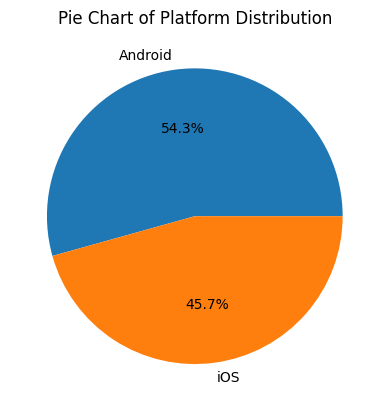

In [43]:
# Pie Chart de Plataformas
plt.pie(df['platform'].value_counts(), labels=df['platform'].unique(), autopct='%1.1f%%')
plt.title('Pie Chart of Platform Distribution')
plt.show()

En este gráfico de torta, se observa la distribución de la plataforma utilizada por los usuarios. Un 54.3% de los usuarios prefieren Android, mientras que un 45.7% utiliza iOS, lo que sugiere una ligera preferencia hacia Android.

- Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

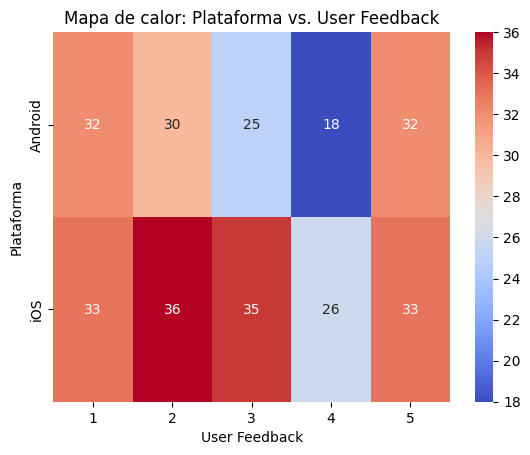

In [46]:
# Crear el mapa de calor de User Feedback vs. Plataforma

crosstab = pd.crosstab(df['platform'], df['user_feedback'])

sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Mapa de calor: Plataforma vs. User Feedback')
plt.ylabel('Plataforma')
plt.xlabel('User Feedback')
plt.show()

Este mapa de calor muestra la frecuencia de calificaciones de los usuarios (1-5) de iOS y Android. La intensidad del color representa la frecuencia, siendo los tonos más oscuros los de mayor frecuencia.

**Android:** Los usuarios suelen dar calificaciones muy bajas (1-2) o muy altas (4-5). Hay una disminución notable en las calificaciones alrededor del 3.

**iOS:** Los usuarios tienden a dar calificaciones más altas (3-5). La distribución es más uniforme en comparación con Android, con menos calificaciones extremas.

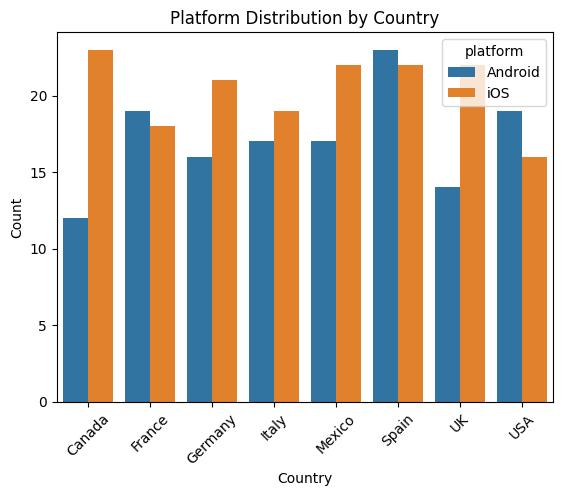

In [48]:
# Bar Chart de Country vs. Platform
sns.countplot(data=df, x="country", hue="platform")
plt.title("Platform Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Este gráfico muestra la distribución de usuarios de Android e iOS en diferentes países. 

El gráfico muestra que **iOS** es más popular que **Android** en la mayoría de los países representados. Esto se observa en la mayor altura de las barras para iOS en la mayoría de los casos.

Tendencias específicas por país:

- EE.UU. y Reino Unido: Estos países tienen un número significativo de usuarios para ambas plataformas, indicando una distribución más equilibrada.
- Canadá, Francia, Alemania, Italia, México y España: Estos países muestran una clara preferencia por iOS, con un mayor número de usuarios de iOS en comparación con Android.